In [30]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:


# Tentukan path ke dataset di Google Drive
dataset_path = '/content/sample_data/diamonds.csv'

# Baca dataset sebagai DataFrame
df = pd.read_csv(dataset_path)

# Tampilkan beberapa baris awal dataset
print(df.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

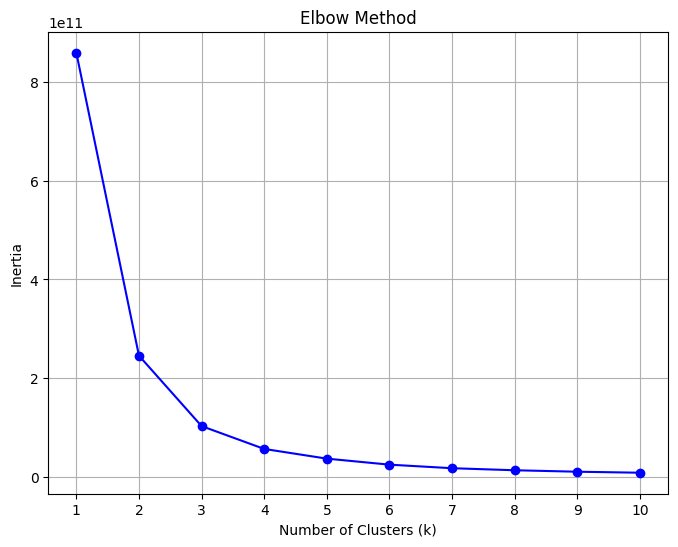

In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Pilih kolom yang akan digunakan untuk analisis
selected_columns = df[['carat', 'depth', 'table', 'price', 'x', 'y']]

# Inisialisasi list untuk menyimpan inertia (total jarak kuadrat) untuk setiap nilai k
inertia = []

# Uji berbagai nilai k dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(selected_columns)
    inertia.append(kmeans.inertia_)

# Visualisasikan elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


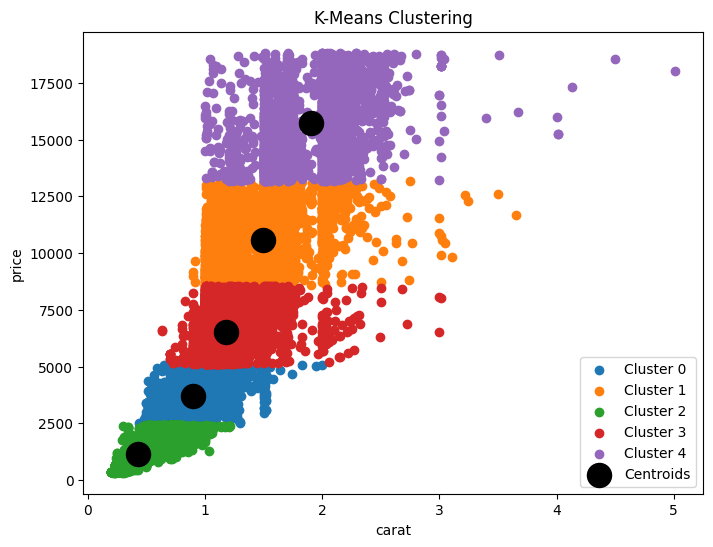

In [33]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fitur yang akan digunakan untuk clustering
features = df[['carat', 'depth', 'table', 'price', 'x', 'y']]

# Jumlah cluster yang diinginkan
n_clusters = 5

# Melakukan K-Means Clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['label'] = kmeans.fit_predict(features)

# Visualisasi berdasarkan label
plt.figure(figsize=(8, 6))
for label in range(n_clusters):
    plt.scatter(df[df['label'] == label]['carat'], df[df['label'] == label]['price'], label=f'Cluster {label}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], s=300, c='black', label='Centroids')
plt.xlabel('carat')
plt.ylabel('price')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


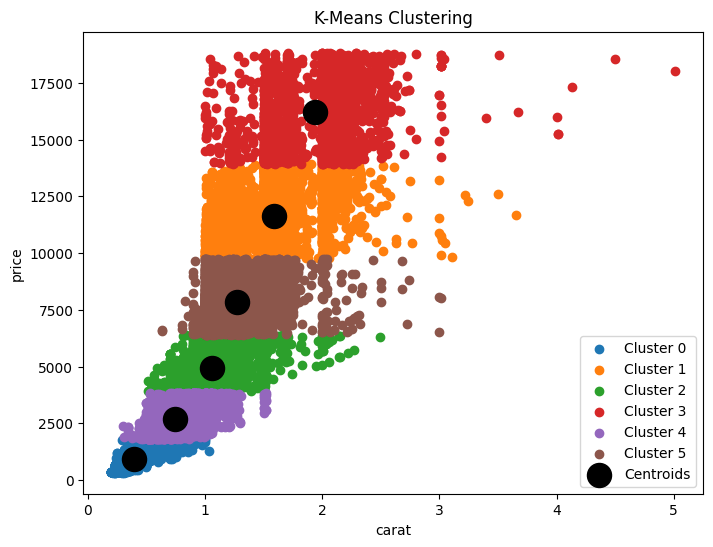

In [34]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fitur yang akan digunakan untuk clustering
features = df[['carat', 'depth', 'table', 'price', 'x', 'y']]

# Jumlah cluster yang diinginkan
n_clusters = 6

# Melakukan K-Means Clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['label'] = kmeans.fit_predict(features)

# Visualisasi berdasarkan label
plt.figure(figsize=(8, 6))
for label in range(n_clusters):
    plt.scatter(df[df['label'] == label]['carat'], df[df['label'] == label]['price'], label=f'Cluster {label}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], s=300, c='black', label='Centroids')
plt.xlabel('carat')
plt.ylabel('price')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


In [35]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Fitur yang akan digunakan untuk clustering
features = df[['carat', 'depth', 'table', 'price', 'x', 'y']]

# Nilai k yang akan diuji (2 hingga 10)
k_values = range(2, 11)

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(features)
    score = silhouette_score(features, labels)
    silhouette_scores.append(score)

# Menampilkan Silhouette Scores untuk setiap nilai k
for k, score in zip(k_values, silhouette_scores):
    print(f'Silhouette Score for k={k}: {score}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for k=2: 0.7078578409100084
Silhouette Score for k=3: 0.6602554440809144
Silhouette Score for k=4: 0.6496358887421116
Silhouette Score for k=5: 0.6217422494259529
Silhouette Score for k=6: 0.6104334592624395
Silhouette Score for k=7: 0.6137032662458298
Silhouette Score for k=8: 0.6092057014358562
Silhouette Score for k=9: 0.603459777710965
Silhouette Score for k=10: 0.5979281072288103


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=2, Davies-Bouldin Index: 0.4968


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=3, Davies-Bouldin Index: 0.4811


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=4, Davies-Bouldin Index: 0.4804


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=5, Davies-Bouldin Index: 0.5028


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=6, Davies-Bouldin Index: 0.4868


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=7, Davies-Bouldin Index: 0.4855


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=8, Davies-Bouldin Index: 0.4969


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=9, Davies-Bouldin Index: 0.4915


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=10, Davies-Bouldin Index: 0.4963


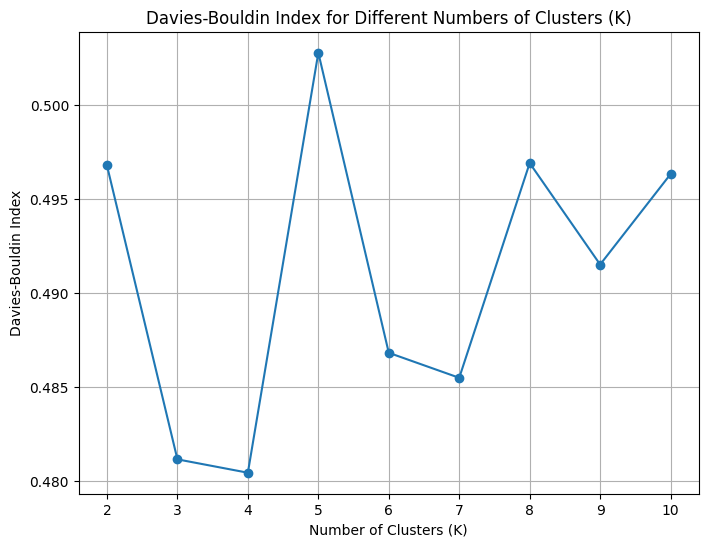

In [37]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Load data into a DataFrame (assuming you have a DataFrame named 'df')
# Replace 'features' with the feature columns you want to use
features = df[['carat', 'depth', 'table', 'price', 'x', 'y']]

# Create an empty list to store the DBI scores
dbi_scores = []

# Define a range of K values from 2 to 10
k_values = range(2, 11)

# Iterate through different K values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(features)
    dbi = davies_bouldin_score(features, labels)
    dbi_scores.append(dbi)
    print(f"K={k}, Davies-Bouldin Index: {dbi:.4f}")

# Plot the DBI scores
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(k_values, dbi_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Different Numbers of Clusters (K)')
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

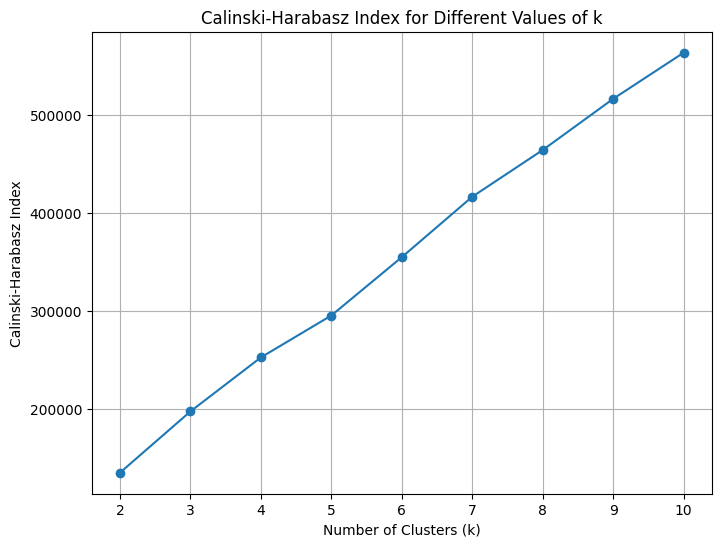

In [38]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

# Mengimpor dataset atau menggunakan DataFrame yang sudah ada
# Gantilah 'nama_file.csv' dengan nama file dataset jika perlu
# Contoh: df = pd.read_csv('nama_file.csv')

# Fitur yang akan digunakan untuk clustering
features = df[['carat', 'depth', 'table', 'price', 'x', 'y']]  # Sesuaikan dengan atribut yang sesuai

# Rentang nilai k yang akan diuji
k_range = range(2, 11)
calinski_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(features)
    score = calinski_harabasz_score(features, labels)
    calinski_scores.append(score)

# Plot Calinski-Harabasz scores
plt.figure(figsize=(8, 6))
plt.plot(k_range, calinski_scores, marker='o', linestyle='-')
plt.title('Calinski-Harabasz Index for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.grid(True)
plt.show()
